(c) Juan Gomez 2019. Thanks to Universidad EAFIT for support. This material is part of the course Introduction to Finite Element Analysis

# Introduction to One-Dimensional Lagrange Interpolation

## Introduction

In a broad sense the finite element method is an approximation technique for functions that represent solutions to boundary and initial value problems. The approximation is achieved primarily using interpolation techniques. In this notebook we will discuss some fundamental and basic aspects of interpolation theory emphasizing in its application in the development of finite element algorithms. The notebook presents a detailed worked example including its Python implementation. At the end of the notebook we propose an independent activity which applies interpolation in a form that resembles some aspects of finite element codes. **After completing this notebook you should be able to:**

* Recognize the problem of function interpolation as one of building or approximating an uknown function in terms of discrete known values of the function.

* Recognize the difference between interpolation polynomials and interpolating polynomials.

* Identify the fundamental properties of Lagrange interpolation polynomials.

* Propose an approximation to a function given a set of $N$ known values of the function in terms of a Lagrange interpolating polynomial.

* Recognize the difference between primary and secondary variables in an interpolation scheme.

## Lagrange Interpolation
The problem of interpolation is that of finding the value of a function $f(x)$ at an arbitrary point $x \in \left[ {{x_1},{x_n}} \right]$, provided we have known discrete values of the function inside the domain. According to Lagrange's interpolation theorem the approximation $\hat f(x)$  to the function $f(x)$ is built like:

\begin{equation}
\hat f(x)={L^I}(x)f^I
\end{equation}

where $L^I$ is the $I$-th Lagrange Polynomial of order $n-1$ and $f^1, f^2,,...,f^n$ are the $n$ known values of the function. The $I$-th Lagrange polynomial is given by the recursive expression:

\begin{equation}
{L^I}(x)=\prod_{J=1, J \ne I}^{n}{\frac{{\left( {x - {x^J}} \right)}}{{\left( {{x^I} - {x^J}} \right)}}} 
\end{equation}

### First order derivative
In the finite element method there is also interest in using interpolation to find values of the derivatives of the primary function. For instance, in elasticity problems, where the primary variable is the displacement field, one is also interested in knowing the strains which are combinations of first order displacement derivatives. Since we only have known nodal values of the displacements, the required derivatives are found using these nodal values. This corresponds to deriving $\hat f(x)$ directly like:


\begin{equation}
\frac{d\hat f}{dx}=\frac{dL^I(x)}{dx}f^I
\end{equation}

Making

$${B^I}(x) = \frac{dL^I(x)}{dx}$$

we can write the interpolation scheme as:

\begin{equation}
\frac{d\hat f}{dx}={B^I}(x)f^I.
\end{equation}




## Example
Formulate an interpolation scheme to find a value of the function:

 \begin{equation}
f(x)=x^3+4x^2-10
\end{equation}

at an arbitrary point $x$ in the interval $\left[ {{-1},{1}} \right]$ assuming we know the exact value of the function at points $x=-1.0$, $x=+1.0$ and $x=0.0.$

In this example the function is known and it seems naive to approximate it using interpolation. However we have selected a known function in order to gain sensibility with the numerical technique and its limitations. Within this context we will assume that in an actual application we know the values of the function a the set of points $x=-1.0$, $x=+1.0$ and $x=0.0$ which are called nodal points or simply `nodes`.

The process of interpoation involves 2 main steps: 

* (i) Finding the interpolation polynomials $L^I$ using the production formula

* (ii) Using linear superpostion to construct the final interpolating polynomial or approximation to the function $\hat f(x)$.

(i) Since we have 3 `nodal` points we need to generate 3 second-order interpolation polynomials, one corresponding to each nodal point. We will label the `nodes` as $x^0 = -1.0$, $x^1 = +1.0$ and $x^2 = 0.0$. Accordingly ${L^0}(x)$, ${L^1}(x)$ and ${L^2}(x)$ will be the second order interpolation polynomials associated to the nodal points $x^0 = -1.0$, $x^1 = +1.0$ and $x^2 = 0.0.$ respectively. Using the product formula we have:

$$L^0(x)=\frac{(x-x^1)(x-x^2)}{(x^0-x^1)(x^0-x^2)}\equiv\frac12(x-1.0)x$$

$$L^1(x)=\frac{(x-x^0)(x-x^2)}{(x^1-x^0)(x^1-x^2)}\equiv\frac12(x+1.0)x$$

$$L^2(x)=\frac{(x-x^0)(x-x^1)}{(x^2-x^0)(x^2-x^1)}\equiv-(x+1.0)(x-1.0).$$

(ii) To arrive at a final approximation to the function we use the linear superposition:

\begin{equation}
\hat f(x)={L^0}(x)f^0+{L^1}(x)f^1+{L^2}(x)f^2
\end{equation}


**Questions:**

**Verify that the interpolation polynomials ${L^0}(x)$, ${L^1}(x)$ and ${L^2}(x)$ satisfy the property $L^I(x^J)=\delta^{IJ}$**

**If the condition $L^I(x^J)=\delta^{IJ}$ is not satisfied by one of the found interpolation functions what would be the effect in the final function approximation?**


### Remarks
* In finite element methods the interoplation polynomials are usually called `shape functions`. 

* The domain of computation is the size-2 interval between $x=-1.0$ and $x=+1.0$. As will be shown later, for systematization reasons in finite element analysis, computational domains of different length are mapped into this size-2 element.

## Solution using Python

In the following blocks of code we show the construction of the final interpolating polynomial  𝑓̂ (𝑥)  using Python. Here we follow a step-by-step approach. To follow the notebook the reader is encouraged to simultaneously implement the code snippets in an independent script and add comments to the most relevant instructions.

### Step 1: Importing modules
When writting Python codes it is necessary to import `modules` or libraries containing predefined Python functions. In this case we will import the `modules`:

* `numpy` which is a library of functions to perform matrix operations analogous to MATLAB.
* `matplotlib` which is a plotting library.
* `scipy` which is a fundamental library for scientific computing.
* `sympy` which is a library to perform symbolic mathematics.

Python imports the modules by using the reserved word `import` followed by the module's name and a pre-fix to be used in further references to the functions contained in that module.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
import sympy as sym

### Step2: Defining a function to find Lagrange interpolation polynomials

A `function` (also called a `subroutine`) in a computer program is a piece of code that performs a given task several times within the program or probably in different programs. In Python these functions are defined by the command word `def` following by the name assigned to the function.

Together with the name, enclosed by brackets, the function defintion should include also a list of parameters (or arguments) to be used by the function when performing the specific task.

In this example we will define a Python function to generate the Lagrange polynomial using the product formula previously defined. We will call this fuction `LagrangPoly` and its input parameters are the independent variale $x$ to be used in the resulting polynomial; the `order` of the polynomial;and the point `i` associated to the polynomial. The defined function will be later invoked from within the main program.

In [2]:
def LagrangPoly(x, order, i, xi=None):
    if xi == None:
        xi = sym.symbols('x:%d' % (order+1))
    index = list(range(order+1))
    index.pop(i)
    return sym.prod([(x-xi[j])/(xi[i]-xi[j]) for j in index])

Alternatively to the defintion of a function using the command word `def` Python also allows the defintion of functions in the sense of calculus, that is as mappings between scalars and/or vectors. This is possible using the `lambda` option (see sample notebook). In this problem we will use the `lambda` option to create the function:

\begin{equation}
f(x)=x^3+4x^2-10.
\end{equation}


**Questions:**

**Use a terminal window or an independent script to test the use of the `lambda` option in the definition of a function. Try different functions**.

In [3]:
fx = lambda x: x**3 + 4.0*x**2 - 10.0

Once $f(x)$ is created using the `lambda` option we define a set of evaluation points. The number of points is defined by the variable `npts` and we use the `numpy` function `linspace` to create an equidistant distribution of points between $x = -1.0$ and $x = +1.0.$ At the same time the empty array `yy` will store the values of the function at the points contained in `xx`.

Note that Python uses the 0-element as an actual member of a list in the definition of arrays and other data structures, so we have started counting from 0 in order to maintain consistency with code implementation.

In [4]:
npts = 200
yy = np.zeros((npts))
xx = np.linspace(-1, 1, npts)

With the function at hand we can compute the (known) values ready to be used in the interpolation scheme. These values will be stored in the array `fd()`. To compute each value of the function we use the now available command word `fx` which is the name that we have used in the function declaration using the `lambda` option.

**Questions:**

**Try using different names in the definition of the function using the `lambda` option and test if your code still works.**

In [5]:
fd = np.array([fx(-1.0), fx(1.0), fx(0.0)])

Now we evaluate the function at the `npts` points and plot it:

<IPython.core.display.Javascript object>


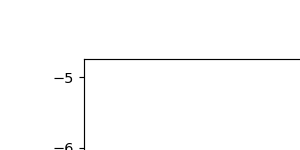

In [6]:
plt.figure(0)
yy = fx(xx)
plt.plot(xx, yy, 'r--')
plt.plot([-1, 1, 0], fd, 'ko')

### Step 3:Finding the Lagrange interpolation polynomials
Now, let us obtain the Lagrange polynomials invoking the function `LagrangPoly()`. We will create a dynamic array named `pol` and each time we obtain a new polynomial we will add it to the array using the Python method `append`. At this point the polynomials, stored in the dynamic array pol[] exist in symbolic notation (just like if we were solving the problem by hand) and are ready to be evaluated at specific values of $x$. 

In [7]:
x = sym.symbols('x')
pol = []
pol.append(sym.simplify(LagrangPoly(x, 2, 0, [-1, 1, 0])))
pol.append(sym.simplify(LagrangPoly(x, 2, 1, [-1, 1, 0])))
pol.append(sym.simplify(LagrangPoly(x, 2, 2, [-1, 1, 0])))
print(pol)

[x*(x - 1)/2, x*(x + 1)/2, 1 - x**2]


**Questions:**

**Plot the 3 resulting second order Lagrange polynomials and verify that they satisfy the property $L^I(x^J)=\delta^{IJ}$.**

**Add more points to the interpolation domain and plot the resulting polynomials. What is the effect in the polynomials?**.

The `subs` method from the module `sympy` substitutes the value of the independent variable $x$ for the value given in $xx[i]$

<IPython.core.display.Javascript object>


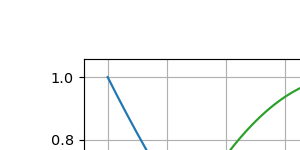

In [8]:
plt.figure(1)
plt.grid()
for k in range(3):
    for i in range(npts):
        yy[i] = pol[k].subs([(x, xx[i])])
    plt.plot(xx, yy)

### Step 4: Finding the interpolating polynomial  to approximate the function $f(x)$
Now we build and plot the complete approximating polynomial $\hat f(x)$ according to the linear superposition;

$$\hat f(x) = {L^0}(x)f({x^0}) + {L^1}(x)f({x^1}) +  {L^2}(x)f({x^2})$$

and using the already available array `pol[]` storing the 3 generated polynomials. Just for ilustration purposes we print it first. The evaluated version of $\hat f(x)$ will be stored in the array `yy[i]`

In [9]:
print(pol[0]*fd[0] + pol[1]*fd[1] + pol[2]*fd[2])

10.0*x**2 - 3.5*x*(x - 1) - 2.5*x*(x + 1) - 10.0


<IPython.core.display.Javascript object>


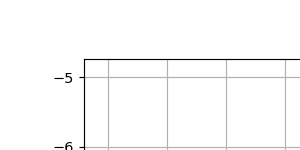

In [10]:
plt.figure(2)
plt.grid()
for i in range(npts):
    yy[i] = fd[0]*pol[0].subs([(x, xx[i])]) + fd[1]*pol[1].subs([(x, xx[i])]) \
        + fd[2]*pol[2].subs([(x, xx[i])])

zz = fx(xx)
plt.plot([-1, 1, 0], fd, 'ko')
plt.plot(xx, yy, 'r--')
plt.plot(xx, zz)

Notice that due to the difference in order between $\hat f(x)$ and the actual function $f(x)$ the interpolating polynomial does not completly match the function although it captures the right values at the nodal points.

**Questions:**

**How can we improve the approximation $\hat f (x)$ to the function $f(x)$ ?**

### Step 5: Finding the derivatives
We now use the `lambda` option once again to define a new function `fdx` corresponding to the first order derivative:

$$f'(x)=3x^2+8x.$$

The derivatives at the nodal points will be stored in the array `fc()`

In [11]:
fdx = lambda x: 3*x**2 + 8.0*x

fc = np.array([fdx(-1.0), fdx(1.0), fdx(0.0)])

The interpolatted derivatives are then obtained according to:


\begin{equation}
\hat f'(x) = \frac{dL^0(x)}{dx} f^0 + \frac{dL^1(x)}{dx}(x) f^1 + \frac{dL^2(x)}{dx} f^2
\end{equation}

[x - 1/2, x + 1/2, -2*x]
8.0*x + 1.0


<IPython.core.display.Javascript object>


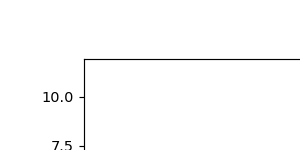

In [12]:
dpol = []
dpol.append(sym.diff(pol[0], x))
dpol.append(sym.diff(pol[1], x))
dpol.append(sym.diff(pol[2], x))
print(dpol)
print(dpol[0]*fd[0] + dpol[1]*fd[1] + dpol[2]*fd[2])
#
plt.figure(3)
yy = fdx(xx)
plt.plot(xx, yy, 'r--')
plt.plot([-1, 1, 0], fc, 'ko')
#
for i in range(npts):
    yy[i] = fd[0]*dpol[0].subs([(x, xx[i])]) + fd[1] * \
        dpol[1].subs([(x, xx[i])]) + fd[2]*dpol[2].subs([(x, xx[i])])
plt.plot(xx, yy)

### Glossary of terms

**Product formula:** Expresion used to derive the Lagarange interpolation polynomial.

**Shape function:** The name given to an interpolation polynomial in the context of finite element methods.

**Nodal point:** (Also node). The name given to specific points where the value of a function is known and used in the
construction of an interpolation scheme.

**Subroutine:** Independent block of code that performs a given task within a general program.

**Interpolation matrix:** One-dimensional or two-dimensional array storing the shape functions in a given interpolation scheme.

### Class activity
The purpose of this activity is to introduce the students into the use of Lagrange interpolation in the particular context of the finite element method.
The FEM uses interpolation domains of constant size (called `elements`)  allowing the use of constant interpolation functions favoring automatization of the numerical scheme. In a typical finite element application the nodal values of a function (say temperature) are found from the solution of a system of algebraic equations. These nodal values are then used not only to find the field over the full domain, but also to perform further computations and obtain additional information of the plhysical problem.

**Follow the steps indicated next to implement, in an independent notebook, an interpolation scheme typical of the ones used in FEM codes. The resulting scheme would correspond to the interpolation within a single element**.


* Assuming that a constant interpolation domain is defined as $x \in \left[ {{-1.0},{+1.0}} \right]$ with nodal points corresponding to $x^0 = -1.0$, $x^1 = +1.0$, $x^2 = 0.0$, $x^3 = -0.25$ and $x^4 = +0.25$ use the function `LagrangPoly()` to generate the interpolation functions associated to these 5 nodal points. In a single graph plot the resulting polynomials.

* Use the interpolation functions found in the previous step, to define a matrix $\left[N(x)\right]$, which will be called in what follows the `function interpolation matrix`, in such a way that the interpolation operation can be conducted using matrix operations like:

$$\hat f(x) = \left[N(x)\right]\left\{F\right\}$$

and where $F$ is a vector storing the nodal values of the function. In your Notebook print the symbolic version of the interpolation matrix.

* In your otebook plot a function $f(x)$ (representing temperature in a bar) and its interpolated version $\hat f(x)$ using the matrix scheme developed in the previous step. The code should plot also the first order derivative of the function.

* To conduct the interpolation in the Notebook create a Python function or subroutine that takes as input parameters the coordinate $x$ where the function is to be approximated and the vector of nodal values of the temperature function and returns upon execution the interpolated value of the function.


In [13]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./nb_style.css', 'r').read()
    return HTML(styles)
css_styling()